In [1]:
import pandas as pd
import os
import numpy as np

#### Merging files from database

In [2]:
df = pd.read_csv("C:/_Tema/_DATA/Training/Databases/names/yob1880.txt", header=None)


files = [file for file in os.listdir("C:/_Tema/_DATA/Training/Databases/names")]

all_years = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/_Tema/_DATA/Training/Databases/names/"+file, header=None)
    
    #Adding year column and filling rows
    
    df['Year'] = file[3:7] 
    all_years = pd.concat([all_years, df])

    all_years.to_csv('all_years.csv', index=False)

#### Read new file

In [3]:
all_data = pd.read_csv("all_years.csv")
all_data.head()

,0,1,2,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


#### Rename columns

In [4]:
all_data.columns = ["Name", "Gender", "Amount", "Year"]
all_data.head()

,Name,Gender,Amount,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### Q1 What the history of the 'Artem' name ?

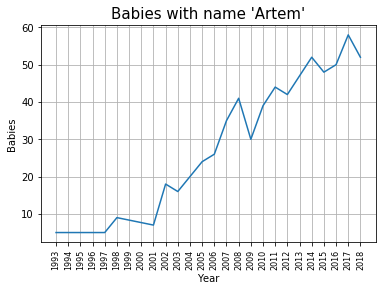

In [5]:
import matplotlib.pyplot as plt

# Filtering Artem ONLY
artem_df = all_data[all_data['Name']=='Artem']

years = range(1993,2019)

# Building the plot
plt.plot(artem_df['Year'], artem_df['Amount'])

# Title and labels
plt.title("Babies with name 'Artem'", fontdict={'fontsize': 15})
plt.xlabel('Year')
plt.ylabel('Babies')

# Ticks
plt.xticks(years, rotation='vertical', size=8)
plt.grid()
plt.show()

### Q2 Compare 'Artem' trend with immigration trend

#### Read immigration database file

In [6]:
immigration = pd.read_excel("C:/_Tema/_DATA/Training/Databases/immigrants.xlsx")
immigration.head()

,Year,Immigrants
0,1850,2244602.0
1,1851,NaN
2,1852,NaN
3,1853,NaN
4,1854,NaN


#### Fill out the gaps in dataframe using linear interpolation

In [7]:
filled_immigration = immigration.interpolate(method ='linear', limit_direction ='forward')
filled_immigration.head()


,Year,Immigrants
0,1850,2244602.0
1,1851,2434011.5
2,1852,2623421.0
3,1853,2812830.5
4,1854,3002240.0


#### Create a plot

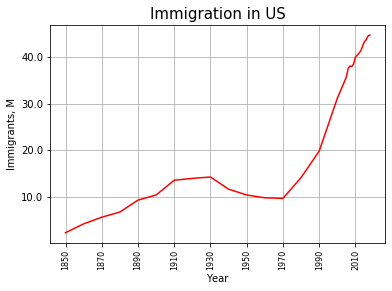

In [8]:
from matplotlib.ticker import FuncFormatter
years = range(1850,2019,20)
#immigrants_range = range(10, 50, 10)


# Creating custom tick for Y axis

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 1e-6)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)


# Building the plot
plt.plot(filled_immigration['Year'], filled_immigration['Immigrants'], color='r')

# Title and labels
plt.title("Immigration in US", fontdict={'fontsize': 15})
plt.xlabel('Year')
plt.ylabel('Immigrants, M')

# Ticks
plt.xticks(years, rotation='vertical', size=8)
#plt.yticks(immigrants_range, rotation='horizontal', size=8)
plt.grid()
plt.show()

#### Create overlaping plot

C:\Users\fusler\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


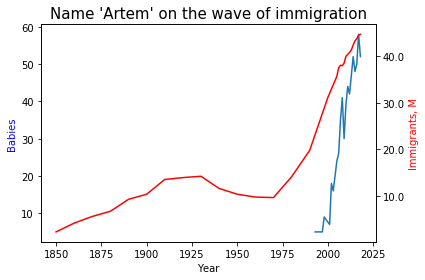

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Creating custom tick for Y axis

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 1e-6)

formatter = FuncFormatter(millions)

ax2.yaxis.set_major_formatter(formatter)

# Plots
ax1.plot(artem_df['Year'],artem_df['Amount'])
ax2.plot(filled_immigration['Year'], filled_immigration['Immigrants'], color='r')

# Ticks and labels
plt.title("Name 'Artem' on the wave of immigration", fontdict={'fontsize': 15})
ax1.set_xlabel('Year')
ax1.set_ylabel('Babies', color='b')
ax2.set_ylabel('Immigrants, M', color='r')
fig.show()

### Q3 Is name Artem popular in the US?

In [16]:
artem2018 = all_data[(all_data.Name =='Artem') & (all_data.Year ==2018)].sum()
all2018 = all_data[(all_data.Name !='Artem') & (all_data.Year ==2018) & (all_data.Gender =='M')].sum()
z = (artem2018['Amount']/(artem2018['Amount']+all2018['Amount']))*100
liam2018 = all_data[(all_data.Name =='Liam') & (all_data.Year ==2018)].sum()
y = (liam2018['Amount']/(artem2018['Amount']+all2018['Amount']))*100
print(f"There is a {round(z,4)} % chance that baby boy will be called Artem in 2018 in the US.")
print(f"There is a {round(y,4)} % chance that baby boy will be called Liam in 2018 in the US.")

There is a 0.0029 % chance that baby boy will be called Artem in 2018 in the US.
There is a 1.1031 % chance that baby boy will be called Liam in 2018 in the US.


### Q4 What is the variation in female vs male names? Which parents are more creative in 2018?

In [11]:
fnames = all_data[(all_data.Gender =='F') & (all_data.Year ==2018)].count()[0]
print(fnames)
mnames = all_data[(all_data.Gender =='M') & (all_data.Year ==2018)].count()[0]
print(mnames)
print((fnames/mnames)*100)

18029
14004
128.74178806055411


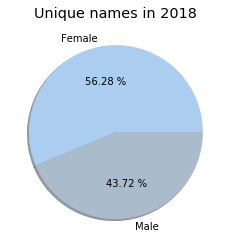

Parents who had a girl in 2018 are 12.56% more creative than the parents who had a boy


In [12]:
labels = ['Female','Male']
colors = ['#abcdef', '#aabbcc']

plt.style.use('ggplot')
plt.pie([fnames,mnames], labels = labels, colors = colors, autopct='%.2f %%', shadow=True)
plt.title('Unique names in 2018')

plt.show()
print(f"Parents who had a girl in 2018 are {round((56.28-43.72),2)}% more creative than the parents who had a boy")